In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Frederick\anaconda3\envs\test_proyec\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [6]:
df_jobs.merge(df_companies, on="company_name")

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


In [13]:
df_usa = df[df["job_location"] == "United States"].copy()
df_usa["job_posted_month"] = df_usa["job_posted_date"].dt.strftime("%B")
df_usa_pivot = df_usa.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
df_usa_pivot = df_usa_pivot.reset_index()
df_usa_pivot["month_no"] = pd.to_datetime(df_usa_pivot["job_posted_month"], format="%B").dt.month
df_usa_pivot = df_usa_pivot.sort_values("month_no")
df_usa_pivot = df_usa_pivot.set_index("job_posted_month")
df_usa_pivot = df_usa_pivot.drop(columns="month_no")

df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,NaN,NaN,8.0,150.0,413.0,5.0,4.0,36.0,104.0,3.0
February,1.0,1.0,7.0,109.0,356.0,3.0,2.0,30.0,78.0,1.0
March,2.0,2.0,9.0,83.0,368.0,2.0,2.0,26.0,86.0,3.0
April,NaN,1.0,12.0,66.0,393.0,7.0,3.0,18.0,93.0,1.0
May,NaN,1.0,8.0,97.0,410.0,6.0,2.0,23.0,79.0,3.0
June,NaN,2.0,10.0,68.0,268.0,4.0,1.0,25.0,53.0,2.0
July,1.0,NaN,13.0,70.0,302.0,NaN,2.0,17.0,62.0,4.0
August,1.0,1.0,9.0,123.0,439.0,5.0,5.0,25.0,168.0,4.0
September,3.0,1.0,29.0,159.0,362.0,11.0,11.0,44.0,92.0,7.0


In [14]:
import random

# Set seed for reproducibility
random.seed(42)

# Define job titles
job_titles = ['Front-End Developer', 'Back-End Developer', 'Full-Stack Developer', 'UI/UX Designer']

# Define months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Define ranges for random data
ranges = {
    'Front-End Developer': (11000, 15000),
    'Back-End Developer': (8000, 10000),
    'Full-Stack Developer': (5000, 7500),
    'UI/UX Designer': (4000, 5000)
}

# Generate random data
data = {}
for job_title in job_titles:
    data[job_title] = [random.randint(ranges[job_title][0], ranges[job_title][1]) for _ in months]

# Create DataFrame
df_US_software_pivot = pd.DataFrame(data, index=months)
df_US_software_pivot.index.name = "job_posted_month"

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [16]:
df_usa_merged = df_usa_pivot.merge(df_US_software_pivot, on="job_posted_month")

In [23]:
top_5 = (
    df_usa_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index
    .tolist()
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Scientist']

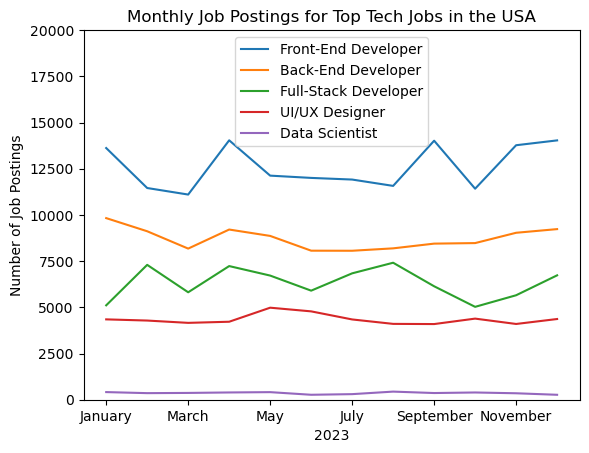

In [26]:
df_usa_merged[top_5].plot(kind="line")

plt.title("Monthly Job Postings for Top Tech Jobs in the USA")
plt.xlabel("2023")
plt.ylabel("Number of Job Postings")
plt.ylim(0, 20000)
plt.legend()
plt.show()